<class 'numpy.ndarray'>
[[225 225 225 ... 225 225 224]
 [225 225 225 ... 225 225 224]
 [225 225 225 ... 225 225 225]
 ...
 [205 192 170 ... 144 142 142]
 [215 211 192 ... 145 145 140]
 [224 220 199 ... 150 149 145]]
(266, 400)
225


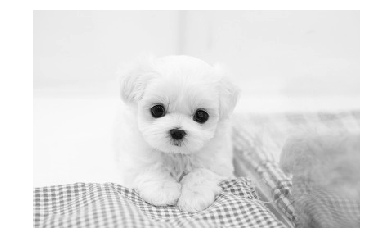

In [7]:
# 파이썬에서 이미지 다루기
# opencv (computr vison library)
# 이미지 데이터 관련 작업(이미지 선명화, 픽셀화 등등)을 
# 기계적으로 수행할 수 있도록 도와주는 라이브러리
# 주로 이미지를 통해 얼굴인식, 장애물 인식, 객체 이식에 사용
# 딥러닝을 통한 이미지 인식에 널리 사용되고 있음
# 심지어 영상처리를 이용한 객체 인식(차량 번호판)에도 사용됨

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2
from PIL import Image

# 그레이스케일 greyscale로 이미지 출력하기
# imread(그림파일, 읽어올 방식)
img = cv2.imread('c:/Java/data/dog.jpg',cv2.IMREAD_GRAYSCALE) # 흑백으로 읽음

print(type(img))  # 이미지 객체의 유형 확인
print(img) # 이미지의 픽셀값 확인
print(img.shape) # 이미지의 크기 확인
print(img[0,0])  # 이미지의 첫번째 픽셀값 확인(0~255)

plt.imshow(img, cmap='gray')
plt.axis('off')  # 축 제거
plt.show()

[[[225 227 221]
  [225 227 221]
  [225 227 221]
  ...
  [225 228 219]
  [225 229 218]
  [224 228 217]]

 [[225 227 221]
  [225 227 221]
  [225 227 221]
  ...
  [225 228 219]
  [225 229 218]
  [224 228 217]]

 [[225 227 221]
  [225 227 221]
  [225 227 221]
  ...
  [225 228 219]
  [225 229 218]
  [225 229 218]]

 ...

 [[223 202 204]
  [213 189 189]
  [197 167 166]
  ...
  [123 140 159]
  [121 138 159]
  [121 138 159]]

 [[220 214 215]
  [220 210 210]
  [208 190 189]
  ...
  [124 141 160]
  [124 141 160]
  [119 136 155]]

 [[229 223 224]
  [229 219 219]
  [213 198 196]
  ...
  [129 146 165]
  [128 145 164]
  [124 141 160]]]
[225 227 221]


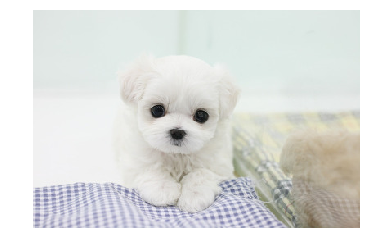

In [5]:
# 칼라패턴 rgb로 이미지 출력하기
img = cv2.imread('c:/Java/data/dog.jpg',cv2.IMREAD_COLOR)
print(img)       # IMREAD_COLOR 로 이미지를 읽으면 기본적으로 BGR 형식으로 픽셀 저장
print(img[0,0])

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')  # 축 제거
plt.show()

In [16]:
# 파이썬에서 이미지 다루기 2 - PIL (Pillow)
# 또 다른 이미지 관련 패키지로 Pillow 가 있는데
# 여러가지 이미지 형식을 다룰 수 있게 해주고 이미지 내부 데이터에 접근, 다양한 이미지 처리 기능
# (이미지 생성, 변환, 필터링)을 지원하고 있음

# 이미지 픽셀화 예제
img = Image.open('c:/Java/data/tower.jpg')
pixels = img.getdata()
print('size',img.size)
print(np.array(pixels))

size (3840, 2160)
[[  2   5  10]
 [  2   5  10]
 [  1   4   9]
 ...
 [222 128   0]
 [229 135   0]
 [251 157  21]]


In [17]:
# 그레이스케일로 변환
gsimg = img.convert('L')
pixels = gsimg.getdata()
print(np.array(pixels))

[  4   4   3 ... 141 147 169]


In [21]:
# 이미지를 31x31 크기의 배열로 만든 후 출력함 
# 이미지 흑백 전환은 average hash 기법을 사용함
# 즉, 각 픽셀값들의 평균값을 기준으로 평균보다 작으면 0, 평균보다 크면 1로 설정

imgsize = 16
gsimg = gsimg.resize((imgsize,imgsize), Image.ANTIALIAS)
# 이미지 크기 재조정 및 테두리를 부드럽고 매끈하게 처리

pixel_data = gsimg.getdata()
pixel_data = np.array(pixel_data)
pixels = pixel_data.reshape(imgsize,imgsize)
# 픽셀들을 16x16 크기로 재조정

avg = pixels.mean()  # 픽셀들의 평균값 계산
diff = 1*(pixels > avg) # 평균보다 크면 1, 아니면 0
print(diff)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
 [1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0]
 [1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0]
 [1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]]


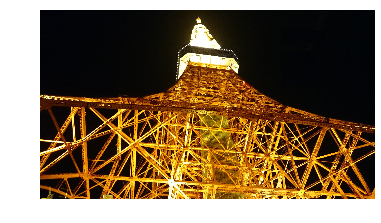

In [20]:
plt.imshow(img)
plt.axis('off')
plt.show()

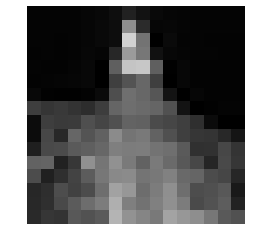

In [22]:
plt.imshow(gsimg)
plt.axis('off')
plt.show()

In [ ]:
plt.imshow(pixels)
plt.axis('off')
plt.show()